# Task: Car Price Prediction

## Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Set Information:

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

## Data Dictionary

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.		

**Source: https://archive.ics.uci.edu/ml/datasets/Automobile


## Read data

In [2]:
df = pd.read_csv('CarPrice.csv')
df['CarName'] = df['CarName'].apply(lambda x: x.split()[0])


In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Data Preprocessing

In [6]:
df['CarName'].nunique()

28

## Label encoder

In [7]:
from sklearn.preprocessing import LabelEncoder

### encode the categorical features

In [8]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'object']
cat_features

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [9]:
encoder = LabelEncoder()

for feature in cat_features:
    df[feature] = encoder.fit_transform(df[feature])

In [10]:
df['CarName'].nunique()

28

## Get the x and y data

In [11]:
x = df.iloc[:, 1:-1]
x = x.drop('CarName', axis = 1)
y = pd.DataFrame(df['price'])

In [12]:
x.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,1,136,5,3.19,3.40,8.0,115,5500,18,22


## Scaling

### Standard scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [14]:
x_scaled = sc.fit_transform(x)

In [15]:
pd.DataFrame(x_scaled)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,-0.844782,...,-0.147475,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,-0.844782,...,-0.147475,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,0.133509,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.708596,-0.231513,-0.190566,...,1.112210,0.604046,0.869568,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,0.938490,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.173698,0.207256,0.136542,...,-0.147475,-0.431076,0.869568,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,0.938490,0.328798,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.107110,0.207256,0.230001,...,-1.407161,0.218885,0.869568,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.721873,1.198549,1.398245,...,-0.147475,0.339248,0.869568,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490
201,-1.476452,0.328798,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.721873,1.198549,1.351515,...,-0.147475,0.339248,0.869568,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195
202,-1.476452,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.721873,1.198549,1.398245,...,1.112210,1.109571,0.869568,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332
203,-1.476452,-3.041381,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.721873,1.198549,1.398245,...,1.112210,0.435538,-0.126306,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059


## Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

## size/shape of dataframe

In [17]:
n_samples = x_train.shape[0]
n_features = x_train.shape[1]
print(f'n_samples: {n_samples}, n_features: {n_features}')

n_samples: 164, n_features: 23


## Make the NN using Sequential API

In [21]:
# Importing the Keras libraries and packages
from keras.layers import Dense 
from keras.models import Sequential

SyntaxError: invalid syntax (3814607956.py, line 2)

In [23]:
# define and initialize the model
model = Sequential()

# Adding the input layer AND the first hidden layer (Pay attention to this)
model.add(Dense(units = 16, activation = 'relu', input_dim = n_features))

# second hidden layer
model.add(Dense(units = 8, activation = 'relu'))

# Adding the last (output) layer
model.add(Dense(units = 1, activation = 'linear'))

c:\Users\Tommy\anaconda3\envs\machine_learning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compiling the ANN

### Custom loss function

In [24]:
import tensorflow as tf 
import tensorflow.keras.backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true-500))) 

In [25]:
model.compile(optimizer = "adam", loss = root_mean_squared_error, 
              metrics =[tf.keras.metrics.RootMeanSquaredError()])

## Fitting the ANN to the Training set

In [26]:
from math import sqrt

history = model.fit(x_train, y_train, validation_split=0.2,
                            batch_size = 10, epochs = 500)

Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 15760.4541 - root_mean_squared_error: 15628.9131 - val_loss: 15873.1787 - val_root_mean_squared_error: 15803.7451
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14578.8828 - root_mean_squared_error: 14273.4248 - val_loss: 15872.7402 - val_root_mean_squared_error: 15803.3076
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15167.6094 - root_mean_squared_error: 14893.6963 - val_loss: 15872.2383 - val_root_mean_squared_error: 15802.8076
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15726.6455 - root_mean_squared_error: 15518.1426 - val_loss: 15871.6934 - val_root_mean_squared_error: 15802.2627
Epoch 5/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15615.0664 - root_mean_squared_error: 15363.6445 - val_loss: 15871.0879 - val_root_mean_squared_error: 15801.6562
Epoch 6/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16098.2891 - root_mean_squared_error: 15789.6865 - val_loss: 15870.3926 - v

### list all the data in history

In [27]:
# list all the data in history
print(history.history.keys())

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


### Plot the metrics for both train and validation set

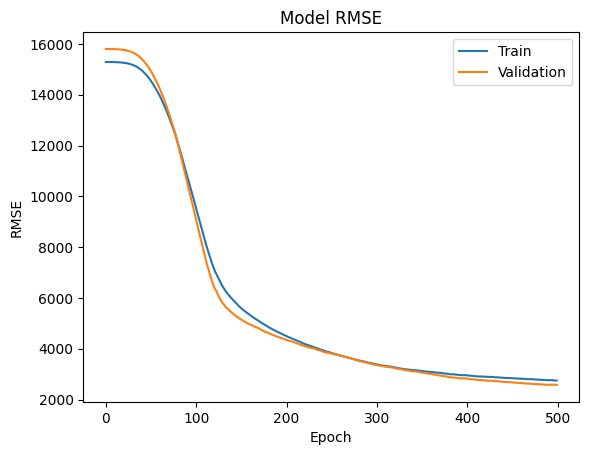

In [28]:
# Plot the accuracy for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### Plot the loss for both train and validation set

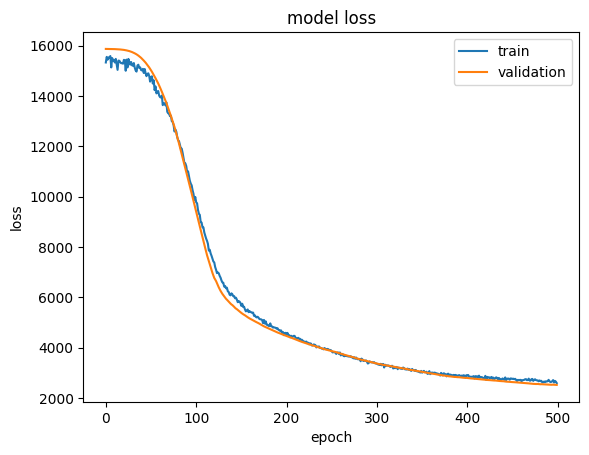

In [29]:
# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

## Let's try more complex model

In [30]:
model = Sequential()
model.add(Dense(128 , activation='relu', input_shape=(n_features,))) # Input Layer

model.add(Dense(64 , activation='relu'))

model.add(Dense(32 , activation='relu'))

model.add(Dense(32 , activation='relu'))

model.add(Dense(8 , activation='relu'))

model.add(Dense(8 , activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam',
              loss=root_mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError()]) # Compiling Model

c:\Users\Tommy\anaconda3\envs\machine_learning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,809 (57.85 KB)

 Trainable params: 14,809 (57.85 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(x_train, y_train, validation_split=0.01,
                            batch_size = 64, epochs = 100)

Epoch 1/100


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - loss: 15724.0059 - root_mean_squared_error: 15292.5293 - val_loss: 26482.4062 - val_root_mean_squared_error: 26002.0898
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 14961.7822 - root_mean_squared_error: 14578.3691 - val_loss: 26481.9316 - val_root_mean_squared_error: 26001.6152
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 15649.3643 - root_mean_squared_error: 15216.5400 - val_loss: 26481.2812 - val_root_mean_squared_error: 26000.9648
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 15616.8486 - root_mean_squared_error: 15194.8662 - val_loss: 26480.4121 - val_root_mean_squared_error: 26000.0938
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 15906.4219 - root_mean_squared_error: 15513.9375 - val_loss: 26479.3281 - val_root_mean_squared_error: 25999.0098
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 15901.6045 - root_mean_squared_error: 15484.3281 - val_loss: 26477.8613 - val_root_mean_squar

In [33]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

### Plot the metrics for both train and validation set

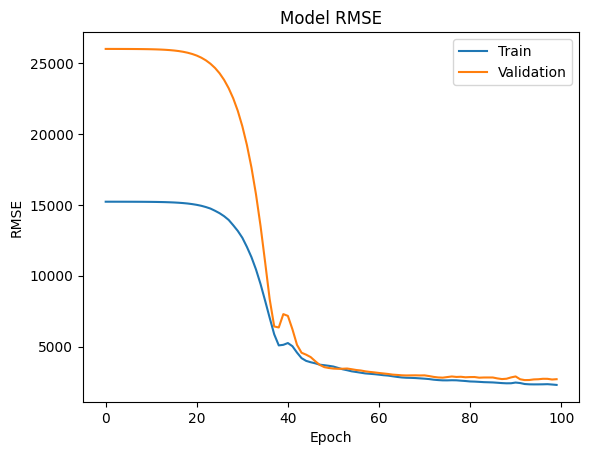

In [34]:
# Plot the RMSE for both train and validation set
plt.subplots()
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


### Plot the loss for both train and validation set

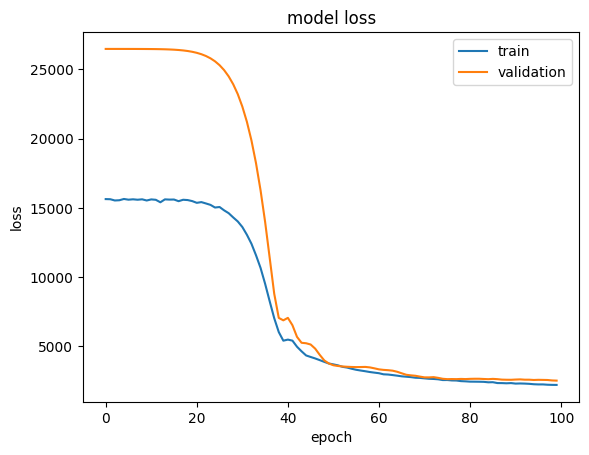

In [146]:
# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

## Reduce overfitting

### Add L2 regularization

In [35]:
model = Sequential()
model.add(Dense(128 , activation='relu', input_shape=(n_features,), kernel_regularizer='l2')) 

model.add(Dense(64 , activation='relu',kernel_regularizer='l2'))

model.add(Dense(32 , activation='relu', kernel_regularizer='l2'))

model.add(Dense(32 , activation='relu', kernel_regularizer='l2'))

model.add(Dense(8 , activation='relu'))

model.add(Dense(8 , activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam',
              loss=root_mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError()]) # Compiling Model

c:\Users\Tommy\anaconda3\envs\machine_learning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
history = model.fit(x_train, y_train, validation_split=0.1,
                            batch_size = 64, epochs = 100)

Epoch 1/100


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 15537.3682 - root_mean_squared_error: 15145.2051 - val_loss: 17617.4785 - val_root_mean_squared_error: 17168.1660
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 15764.2920 - root_mean_squared_error: 15340.3789 - val_loss: 17617.3906 - val_root_mean_squared_error: 17168.1465
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 15462.3086 - root_mean_squared_error: 15032.6455 - val_loss: 17617.3066 - val_root_mean_squared_error: 17168.1348
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 15199.7207 - root_mean_squared_error: 14793.2998 - val_loss: 17617.2266 - val_root_mean_squared_error: 17168.1230
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14844.8721 - root_mean_squared_error: 14489.1855 - val_loss: 17617.1504 - val_root_mean_squared_error: 17168.1152
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 15310.8027 - root_mean_squared_error: 14891.3887 - val_loss: 17617.0684 - val_root_mean_squar

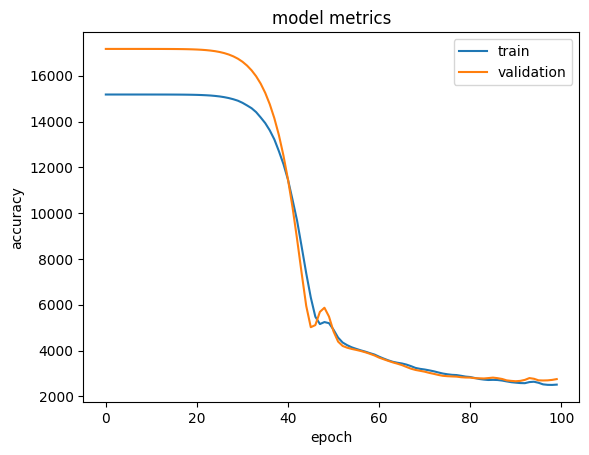

In [37]:
# Plot the accuracy for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model metrics')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

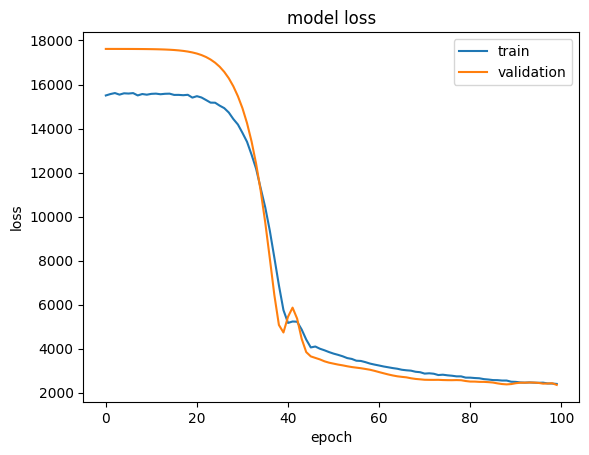

In [150]:
# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

### Add dropout layers

In [38]:
from keras.layers import Dropout

In [39]:
model = Sequential()
model.add(Dense(128 , activation='relu', input_shape=(n_features,))) 
model.add(Dense(64 , activation='relu'))
model.add(Dropout(0.2)) # Dropout Layer
model.add(Dense(32 , activation='relu'))
model.add(Dense(32 , activation='relu'))

model.add(Dense(8 , activation='relu'))
model.add(Dropout(0.4)) # Dropout Layer

model.add(Dense(8 , activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam',
              loss=root_mean_squared_error,
              metrics=['mae']) # Compiling Model

c:\Users\Tommy\anaconda3\envs\machine_learning\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
history = model.fit(x_train, y_train, validation_split=0.1,
                            batch_size = 128, epochs = 100)

Epoch 1/100


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - loss: 15269.4053 - mae: 12881.2734 - val_loss: 17615.5195 - val_mae: 15311.5693
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 15662.4434 - mae: 13114.1582 - val_loss: 17615.4688 - val_mae: 15311.5293
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 15609.4512 - mae: 13038.3350 - val_loss: 17615.4453 - val_mae: 15311.5068
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 15479.2803 - mae: 12988.3154 - val_loss: 17615.4180 - val_mae: 15311.4775
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 15655.1064 - mae: 13114.1826 - val_loss: 17615.3848 - val_mae: 15311.4453
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 15662.2891 - mae: 13125.4648 - val_loss: 17615.3477 - val_mae: 15311.4082
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 15659.5508 - mae: 13133.5967 - val_loss: 17615.2988 - val_mae: 15311.3564
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 15653.0947 - mae: 13139.9561 

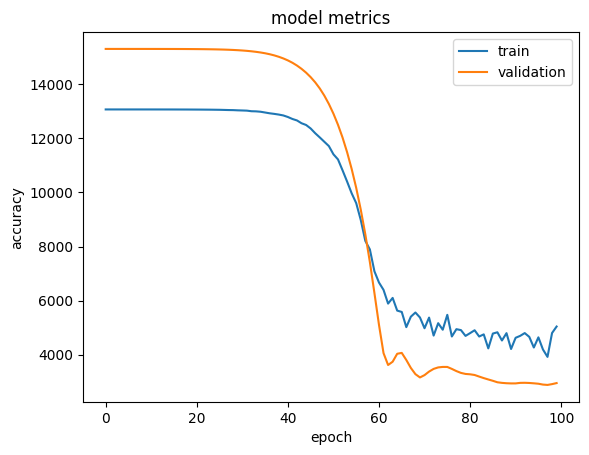

In [41]:
# Plot the metrics for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model metrics')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

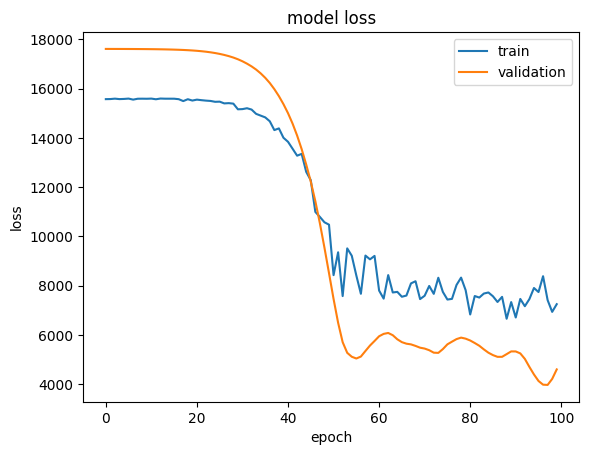

In [155]:
# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

## Make the NN using Functional API

In [51]:
# Multilayer Perceptron
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
import tensorflow as tf
visible = Input(shape=(n_features,))
hidden1 = Dense(128, activation='relu')(visible)
hidden2 = Dense(64, activation='relu')(hidden1)
hidden3 = Dense(32, activation='relu')(hidden2)
hidden4 = Dense(32, activation='relu')(hidden3)
output = Dense(1, activation='relu')(hidden4)
model = Model(inputs=visible, outputs=output)
model.compile(optimizer='adam',loss=root_mean_squared_error, metrics=['mae'])
# summarize layers
print(model.summary())
# plot graph

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 23)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,497 (56.63 KB)

 Trainable params: 14,497 (56.63 KB)

 Non-trainable params: 0 (0.00 B)

None


In [52]:
history = model.fit(x_train, y_train, validation_split=0.1,
                            batch_size = 128, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 15656.5664 - mae: 13070.5928 - val_loss: 17615.0059 - val_mae: 15311.0752
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 15479.3594 - mae: 13016.4404 - val_loss: 17614.7109 - val_mae: 15310.7959
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 15434.4346 - mae: 12963.3232 - val_loss: 17614.3770 - val_mae: 15310.4834
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 15489.2207 - mae: 12994.1289 - val_loss: 17613.9629 - val_mae: 15310.1064
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 15662.8281 - mae: 13121.9023 - val_loss: 17613.4648 - val_mae: 15309.6543
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 15359.9873 - mae: 12911.2168 - val_loss: 17612.9004 - val_mae: 15309.1367
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 15732.2324 - mae: 13208.7217 - val_loss: 17612.2539 - val_mae: 15308.5391
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 15458.4336 - mae:

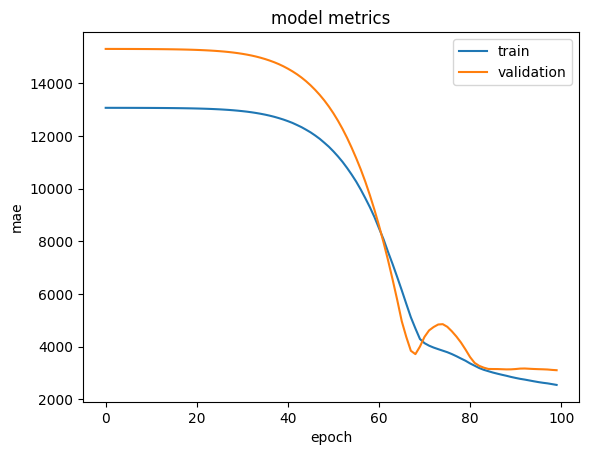

In [53]:
# Plot the metrics for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model metrics')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

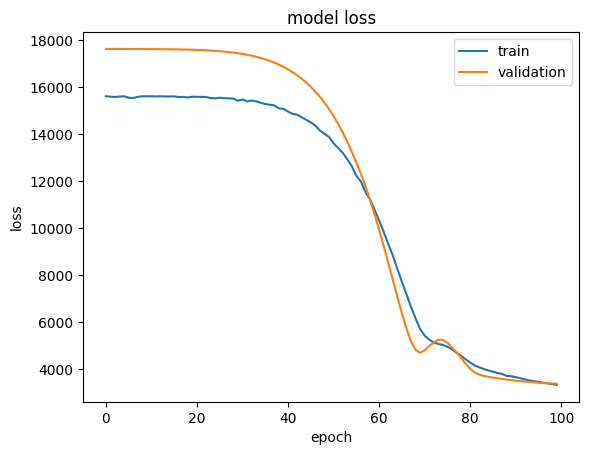

In [54]:
# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()